# Explore the ESEC avalanches

Here, we want to observe the distribution of data in the catalog.

In [1]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import catalog
import computations as cp
import figures
import matrix

tqdm.pandas()

catalog.display_parameters()

## Load the catalog

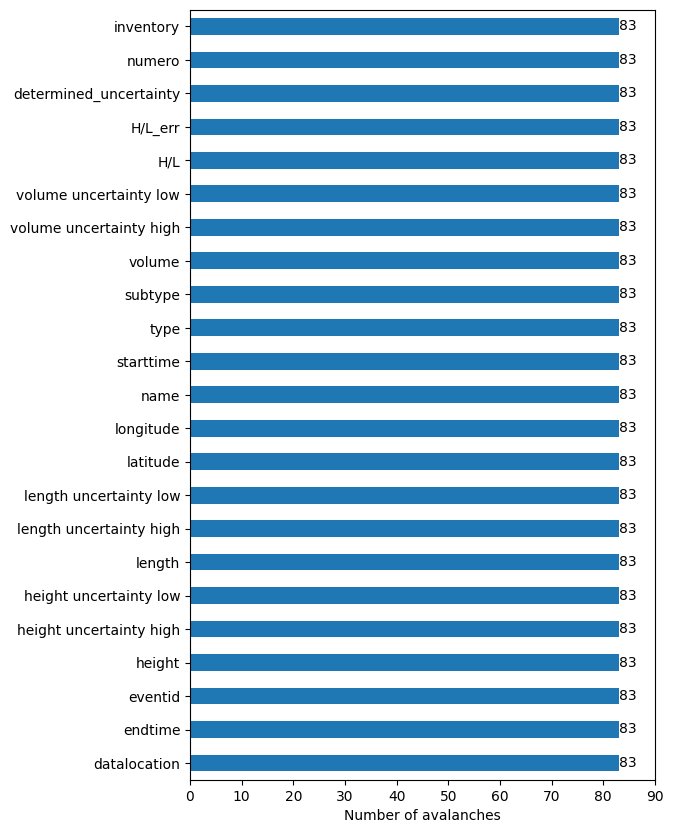

In [2]:
ESEC_avalanches = catalog.load("catalog/5_ESEC_avalanches_83.pickle")

catalog.open_plot(ESEC_avalanches, 0.11, 90)

## Distribution of "type" column

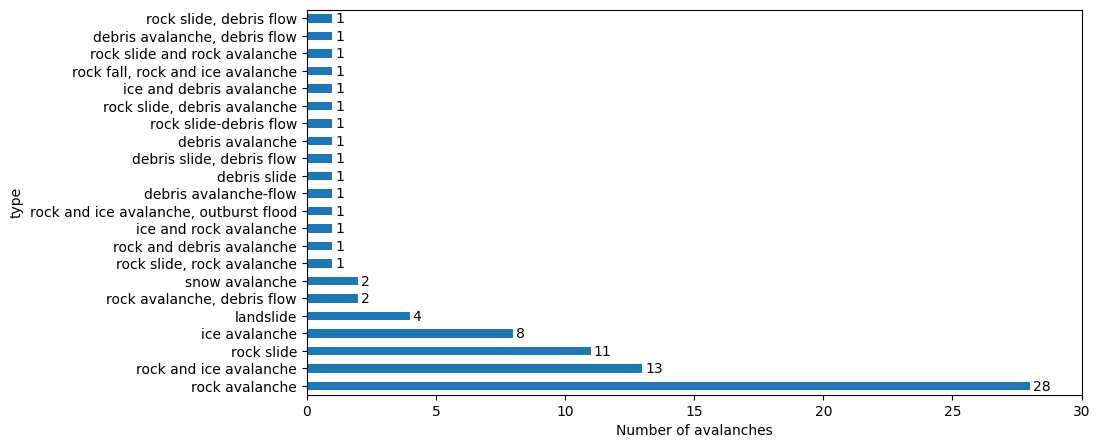

In [3]:
catalog.see_word_distribution(ESEC_avalanches["type"], 0.27, 30)

figures.save("figures/histograms_type.pdf", tight_layout=False)

## Distribution of "subtype" column

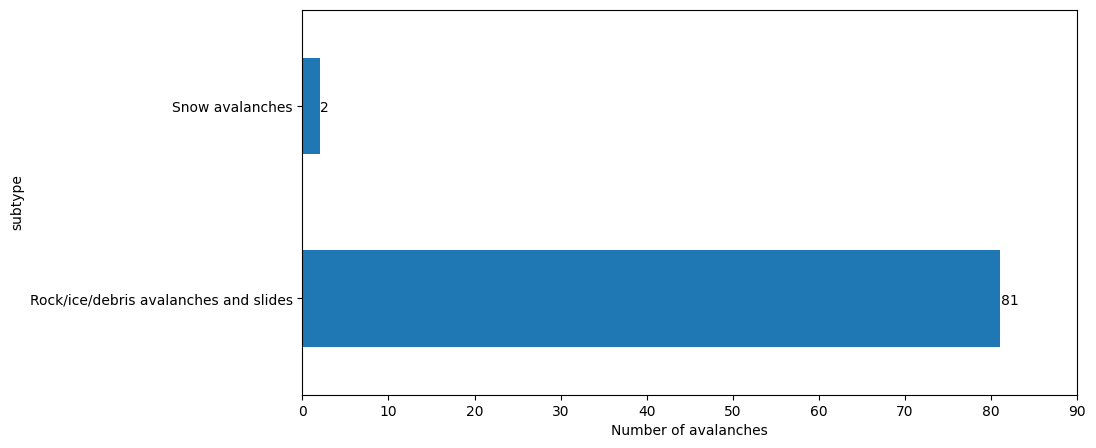

In [4]:
catalog.see_word_distribution(ESEC_avalanches["subtype"], 0.03, 90)

figures.save("figures/histograms_subtype.pdf", tight_layout=False)

## Distribution of morphometric parameters (volume, height and length)

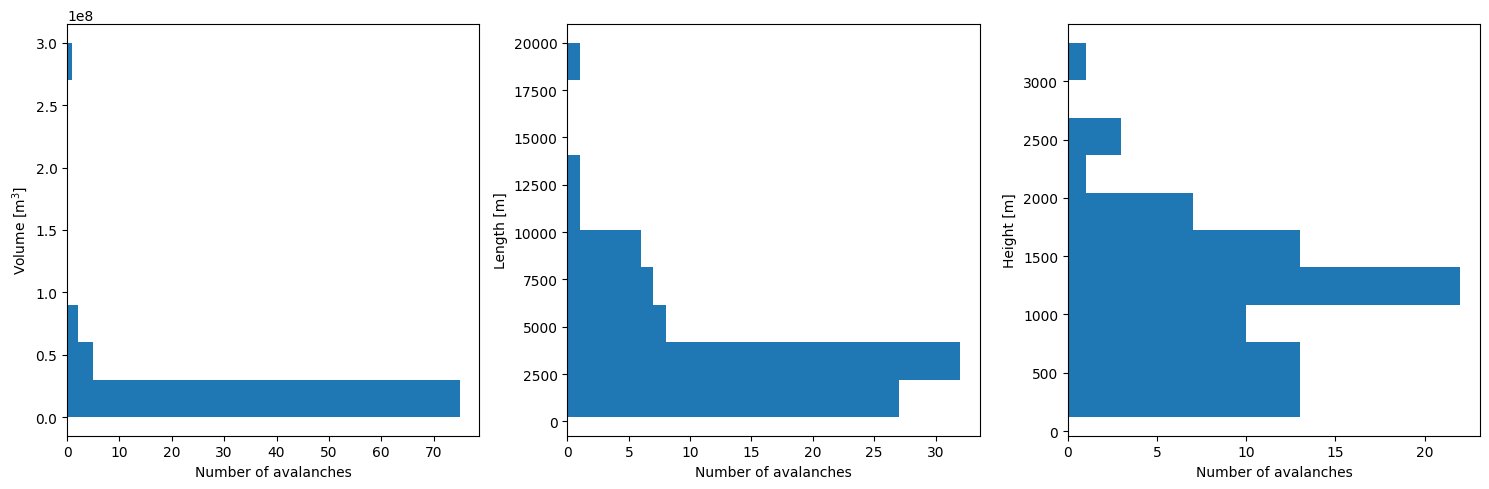

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

catalog.see_number_distribution(ESEC_avalanches["volume"], axs[0], r"Volume $\mathrm{[m^3]}$")
catalog.see_number_distribution(ESEC_avalanches["length"], axs[1], "Length [m]")
catalog.see_number_distribution(ESEC_avalanches["height"], axs[2], "Height [m]")

figures.save("figures/histograms_morphometric_parameters.pdf", tight_layout=True)

## Distribution of number of stations

  0%|          | 0/83 [00:00<?, ?it/s]

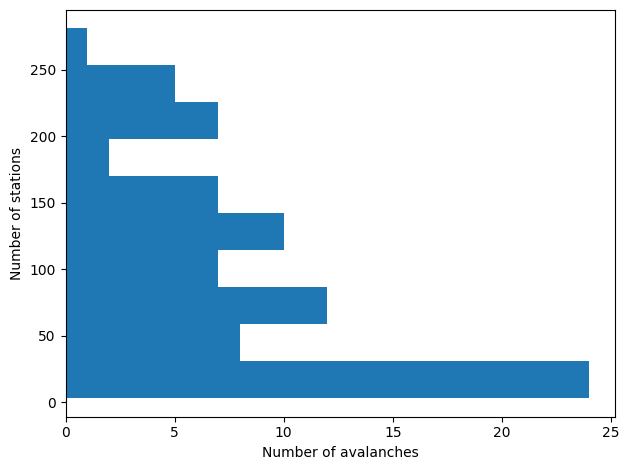

In [6]:
## Loop for add the number of stations for each event in a new column
ESEC_avalanches = cp.compute_number_of_stations(ESEC_avalanches, print = False)

## See the distribution of stations in all events
_, ax = plt.subplots(1, 1)
catalog.see_number_distribution(ESEC_avalanches["Number of stations"], ax, "Number of stations")

figures.save("figures/histograms_number_of_stations.pdf", tight_layout=True)
ESEC_avalanches.to_pickle("catalog/6_ESEC_avalanches_83.pickle")

## Compare column values

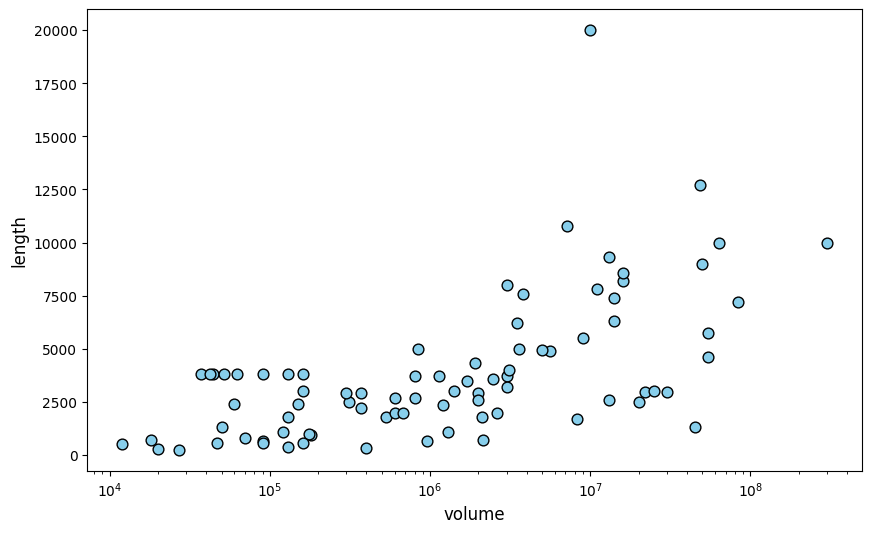

<Figure size 640x480 with 0 Axes>

In [7]:
## It is possible to compare this columns : "volume", "latitude", "longitude", "type", "subtype", "length", "height", "H/L", "Number of stations"

X = "volume"
Y = "length"

figures.scatter_plot(ESEC_avalanches[X], ESEC_avalanches[Y], X, Y, logx=True, logy=False)

figures.save(f"figures/scatter_plot/scatter_plot_{X}_{Y}.pdf", tight_layout=True)

## Create a correlation matrix to see the relation between columns

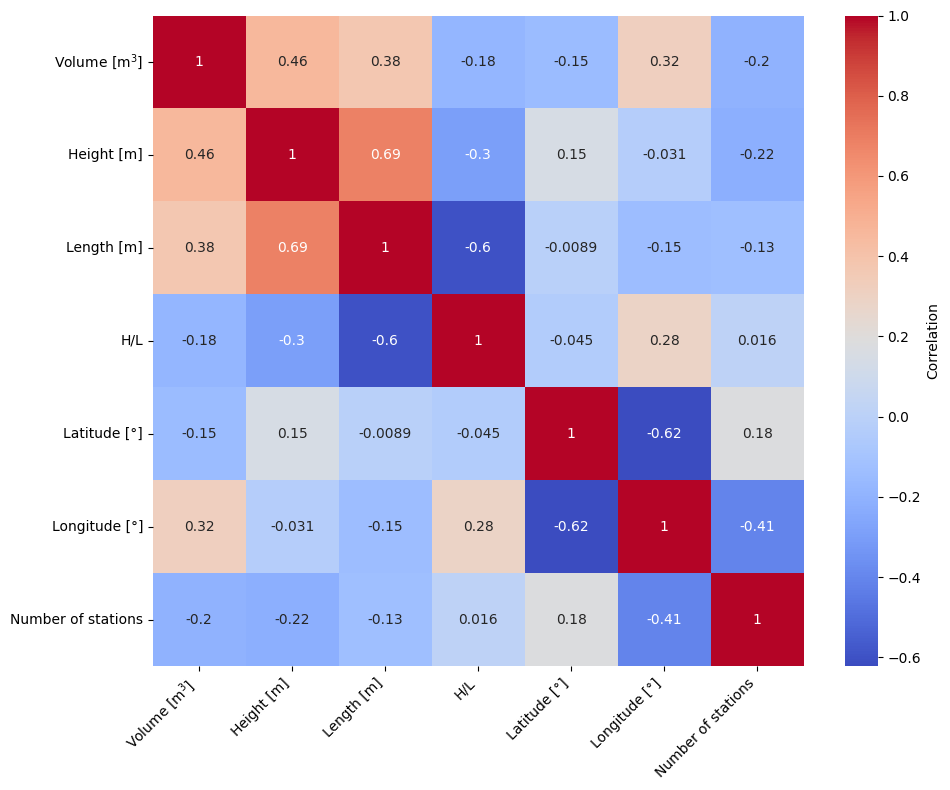

<Figure size 640x480 with 0 Axes>

In [8]:
columns = ["volume", "height", "length", "H/L", "latitude", "longitude", "Number of stations"]
label = [r"Volume [$\mathrm{m^3}$]", "Height [m]", "Length [m]", "H/L", "Latitude [°]", "Longitude [°]", "Number of stations"]

data_to_correlate = ESEC_avalanches[columns]

matrix.correlation_matrix(data_to_correlate, label, annotate=True)

figures.save(f"figures/correlation_matrix.pdf", tight_layout=True)